In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Verify that the drive is mounted
!ls /content/drive/MyDrive/data\ mining

netflix_watching_history_week1.csv


In [8]:
# Define file path (Ensure correct spacing and file extension)
file_path = "/content/drive/MyDrive/data mining/netflix_watching_history_week1.csv"

In [9]:
# Load the dataset
df = pd.read_csv(file_path)

In [10]:
# Display first few rows
df.head()

,User_ID,Age_Group,Gender,Show_ID,Title,Genre,Viewing_Duration,Completion_Status,Rating,Device,...,Likes,Shares,Comments,Watch_Time_Of_Day,Region,Month,Day_of_Week,Release_Year,Director,Cast
0,1,18-24,Undisclosed,13,Show_13,Fantasy,41,Completed,2.0,TV,...,Yes,No,Yourself change fill red make none owner docto...,Evening,Africa,April,Sunday,2020,George Griffith,"Jeremy Green, Deborah Simmons, Ann Hawkins"
1,1,18-24,Undisclosed,20,Show_20,Action,55,Midway,1.0,Mobile,...,No,No,Too case alone. Off yet effort candidate popul...,Morning,Africa,August,Friday,2005,Stefanie Mejia,"Leonard Elliott, Christopher Harvey, Matthew D..."
2,1,18-24,Undisclosed,69,Show_69,Comedy,21,Completed,2.0,Mobile,...,Yes,No,Magazine national difficult behavior age. Fill...,Evening,Africa,February,Friday,2017,Joseph Wood,"Ronald Moore, Shawn Walls, Michael Chung, Case..."
3,1,18-24,Undisclosed,70,Show_70,Action,52,Completed,4.0,Mobile,...,No,No,Structure a huge. Half name beyond understand ...,Evening,Africa,April,Saturday,2023,Oscar Ponce,"Tim Montgomery, Trevor Romero, Sally Murphy"
4,1,18-24,Undisclosed,85,Show_85,Thriller,60,Completed,5.0,Tablet,...,Yes,Yes,Send seem member go whom another. Answer usual...,Night,Africa,November,Tuesday,2022,Erin Braun,"Stuart Stewart, Cristina Lawrence, John Walker..."


In [11]:
# Check for missing values
print(df.isnull().sum())

User_ID                      0
Age_Group                    0
Gender                       0
Show_ID                      0
Title                        0
Genre                        0
Viewing_Duration             0
Completion_Status            0
Rating                     753
Device                       0
Number_of_Views              0
Skip_Scenes                  0
Watchlist                    0
Re-watched                9036
Viewing_Session_Length       0
Co-viewing                   0
Likes                        0
Shares                       0
Comments                  2259
Watch_Time_Of_Day            0
Region                       0
Month                        0
Day_of_Week                  0
Release_Year                 0
Director                     0
Cast                         0
dtype: int64


# --- Handling Missing Data ---

In [12]:
# 1. Rating - Numerical Column
print(df['Rating'].dtype)

float64


In [13]:
# Use SimpleImputer to fill NaN values with the mean
imputer_rating = SimpleImputer(strategy='mean')
df['Rating'] = imputer_rating.fit_transform(df[['Rating']])

In [14]:
# Verify that there are no more NaN values in the 'Rating' column
print(df['Rating'].isnull().sum())


0


In [15]:
# 2. Completion_Status - Categorical Column
# Impute with the most frequent value (mode)
most_frequent_completion = df['Completion_Status'].mode()[0]  # Get the first mode

In [16]:
# Verify that there are no more NaN values in the 'Completion_Status' column
print(df['Completion_Status'].isnull().sum())

0


# --- Data Analysis and Visualizations ---


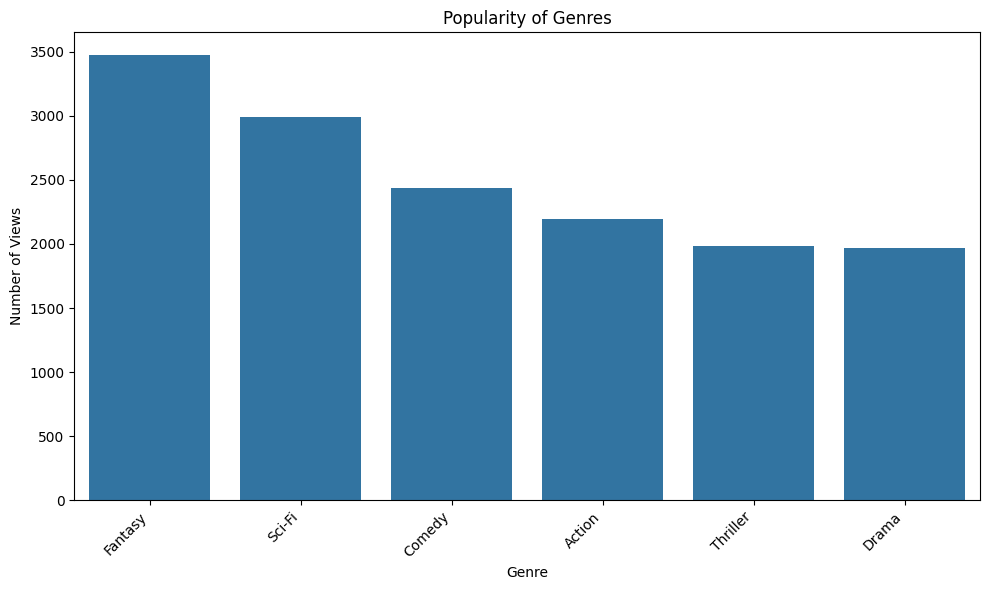

In [17]:
# 1. Genre Popularity
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Number of Views")
plt.title("Popularity of Genres")
plt.tight_layout()
plt.show()

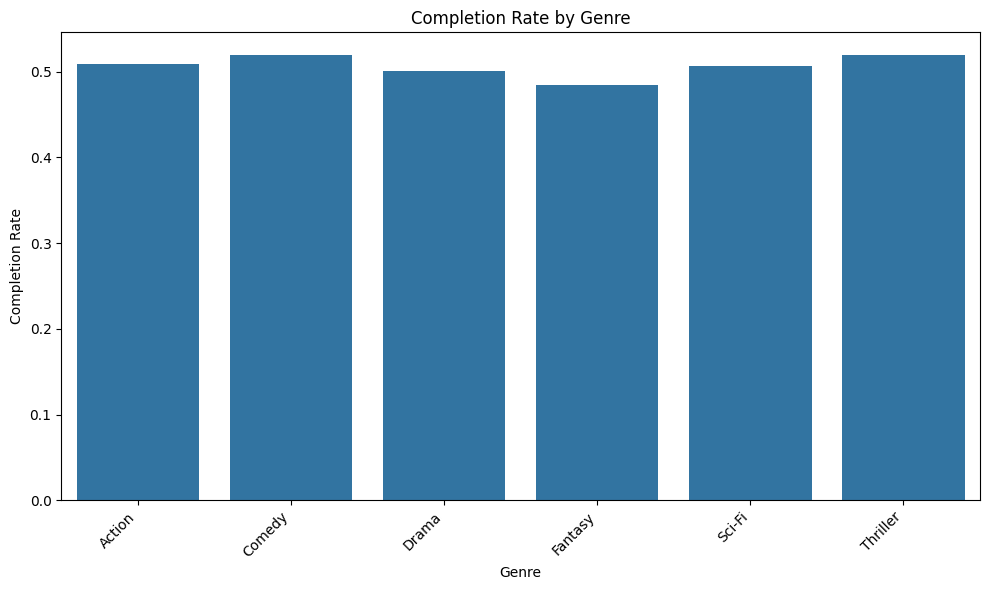

In [18]:
 #Completion Rate vs. Genre
completion_rates = df.groupby('Genre')['Completion_Status'].apply(lambda x: (x == 'Completed').sum() / len(x))
plt.figure(figsize=(10, 6))
sns.barplot(x=completion_rates.index, y=completion_rates.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Completion Rate")
plt.title("Completion Rate by Genre")
plt.tight_layout()
plt.show()


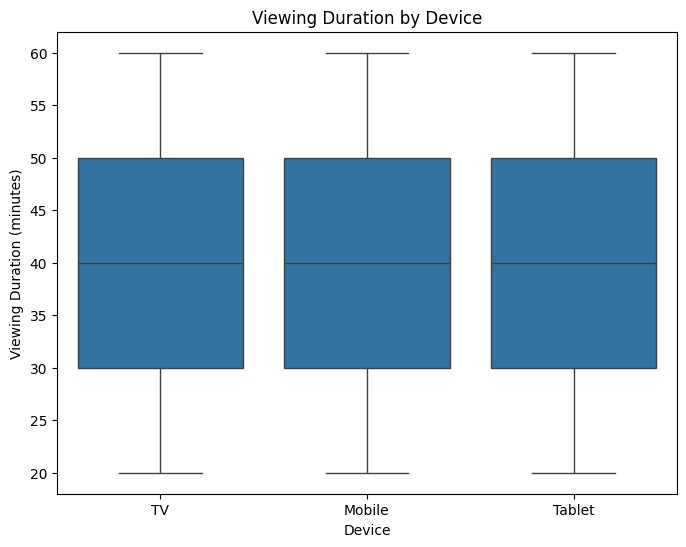

In [19]:
# 3. Viewing Duration by Device
plt.figure(figsize=(8, 6))
sns.boxplot(x='Device', y='Viewing_Duration', data=df)
plt.xlabel("Device")
plt.ylabel("Viewing Duration (minutes)")
plt.title("Viewing Duration by Device")
plt.show()

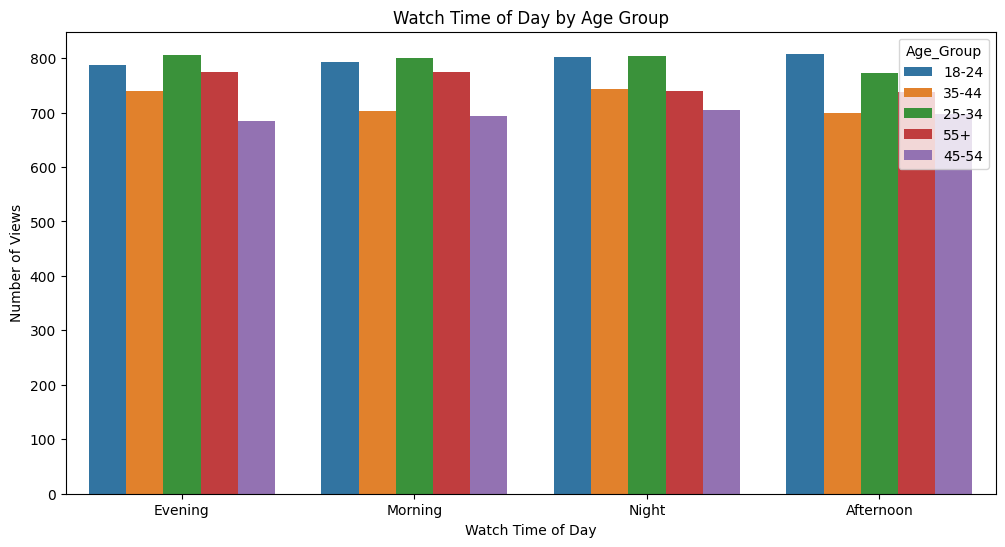

In [20]:
# Example 4: Watch Time of Day by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(x='Watch_Time_Of_Day', hue='Age_Group', data=df)
plt.xlabel("Watch Time of Day")
plt.ylabel("Number of Views")
plt.title("Watch Time of Day by Age Group")
plt.show()

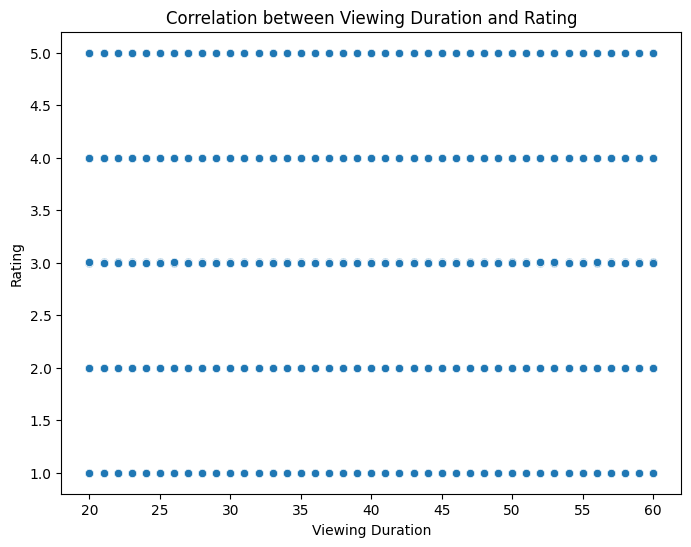

In [21]:
# Example 5: Correlation between Viewing Duration and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Viewing_Duration', y='Rating', data=df)
plt.xlabel("Viewing Duration")
plt.ylabel("Rating")
plt.title("Correlation between Viewing Duration and Rating")
plt.show()

In [24]:
# Create a new column indicating whether a show was re-watched (True/False)
df['Re_watched_bool'] = df['Re-watched'].apply(lambda x: 1 if x == 'Yes' else 0)

In [25]:
# Group by Genre and calculate the percentage of re-watched shows
rewatch_by_genre = df.groupby('Genre')['Re_watched_bool'].mean().sort_values(ascending=False)


In [26]:
# Print the results
print("\nPercentage of Re-watched Content by Genre:")
print(rewatch_by_genre)


Percentage of Re-watched Content by Genre:
Genre
Comedy      0.207067
Drama       0.205076
Fantasy     0.202415
Action      0.197452
Thriller    0.191746
Sci-Fi      0.182426
Name: Re_watched_bool, dtype: float64


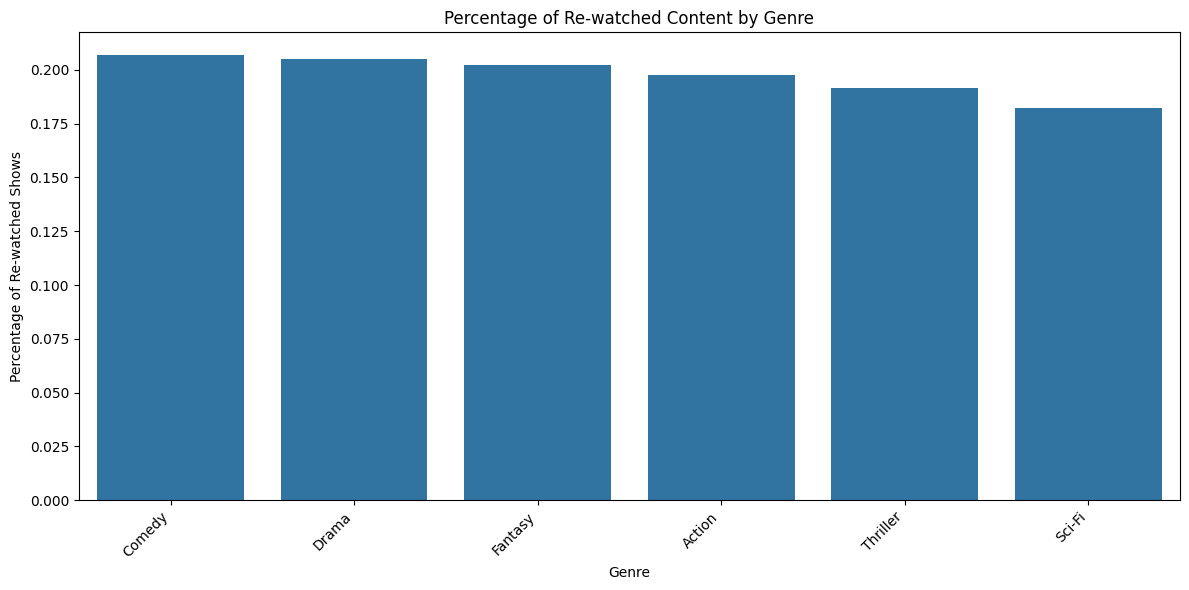

In [27]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=rewatch_by_genre.index, y=rewatch_by_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Percentage of Re-watched Shows")
plt.title("Percentage of Re-watched Content by Genre")
plt.tight_layout()
plt.show()